Tianran Cui
<br> Kurt Hahn
<br> Claire Kreisel

In [1]:
from qiskit import *
from qiskit import quantum_info, visualization, Aer, transpile

In [2]:
qubits=2
tests=1

q = QuantumRegister(2)
c = ClassicalRegister(2)

### Grover Diffusion Operator

In [3]:
def grover_diffusion(circuit, register):
    circuit.barrier()
    circuit.h(register)
    circuit.x(register)
    circuit.cz(register[0], register[1])
    circuit.x(register)
    circuit.h(register)

### |00⟩ Oracle

In [4]:
def oracle_00(circuit, register):
    circuit.barrier()
    circuit.cz(register[0], register[1])
    circuit.z(register)

qc = QuantumCircuit(q,c)

qc.h(q)
for test in range (0, tests):
    oracle_00(qc, q)
    grover_diffusion(qc, q)     
qc.barrier()
qc.measure(q, c)

qc.draw()

┌───┐ ░    ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
q0_0: ┤ H ├─░──■─┤ Z ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
      ├───┤ ░  │ ├───┤ ░ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
q0_1: ┤ H ├─░──■─┤ Z ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
      └───┘ ░    └───┘ ░ └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
c0: 2/══════════════════════════════════════════════╩══╩═
                                                    0  1

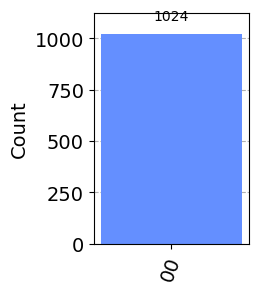

In [5]:
backend = Aer.get_backend('aer_simulator')
qobj = transpile(qc, backend)
shots=1024

result = backend.run(qobj, shots=shots).result()
data = result.get_counts()
visualization.plot_histogram(data, (2, 3))

### |01⟩ Oracle

In [6]:
def oracle_01(circuit, register):
    circuit.barrier()
    circuit.cz(register[0], register[1])
    circuit.z(register[0])
    
qc = QuantumCircuit(q,c)

qc.h(q)
for test in range (0, tests):
    oracle_01(qc, q)
    grover_diffusion(qc, q)     
qc.barrier()
qc.measure(q, c)

qc.draw()

┌───┐ ░    ┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
q0_0: ┤ H ├─░──■─┤ Z ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
      ├───┤ ░  │ └───┘ ░ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
q0_1: ┤ H ├─░──■───────░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
      └───┘ ░          ░ └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
c0: 2/══════════════════════════════════════════════╩══╩═
                                                    0  1

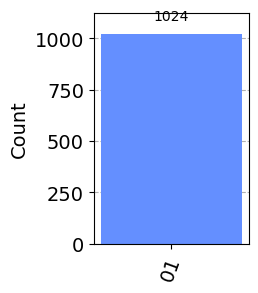

In [7]:
backend = Aer.get_backend('aer_simulator')
qobj = transpile(qc, backend)
shots=1024

result = backend.run(qobj, shots=shots).result()
data = result.get_counts()
visualization.plot_histogram(data, (2,3))

### |10⟩ Oracle

In [8]:
def oracle_10(circuit, register):
    circuit.barrier()
    circuit.cz(register[0], register[1])
    circuit.z(register[1])
    
qc = QuantumCircuit(q,c)

qc.h(q)
for test in range (0, tests):
    oracle_10(qc, q)
    grover_diffusion(qc, q)     
qc.barrier()
qc.measure(q, c)

qc.draw()

┌───┐ ░          ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
q0_0: ┤ H ├─░──■───────░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
      ├───┤ ░  │ ┌───┐ ░ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
q0_1: ┤ H ├─░──■─┤ Z ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
      └───┘ ░    └───┘ ░ └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
c0: 2/══════════════════════════════════════════════╩══╩═
                                                    0  1

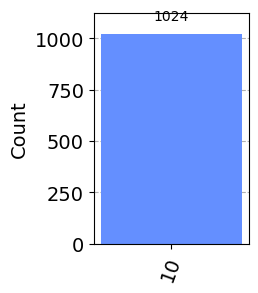

In [9]:
backend = Aer.get_backend('aer_simulator')
qobj = transpile(qc, backend)
shots=1024

result = backend.run(qobj, shots=shots).result()
data = result.get_counts()
visualization.plot_histogram(data, (2,3))

### |11⟩ Oracle

In [10]:
def oracle_11(circuit, register):
    circuit.barrier()
    circuit.cz(register[0], register[1])
    
qc = QuantumCircuit(q,c)

qc.h(q)
for test in range (0, tests):
    oracle_11(qc, q)
    grover_diffusion(qc, q)     
qc.barrier()
qc.measure(q, c)

qc.draw()

┌───┐ ░     ░ ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
q0_0: ┤ H ├─░──■──░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
      ├───┤ ░  │  ░ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
q0_1: ┤ H ├─░──■──░─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
      └───┘ ░     ░ └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
c0: 2/═════════════════════════════════════════╩══╩═
                                               0  1

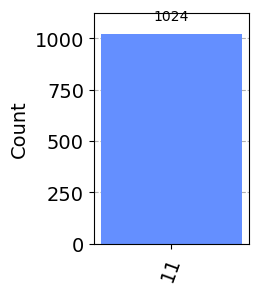

In [11]:
backend = Aer.get_backend('aer_simulator')
qobj = transpile(qc, backend)
shots=1024

result = backend.run(qobj, shots=shots).result()
data = result.get_counts()
visualization.plot_histogram(data, (2,3))